In [3]:
# What drives the price of a car?

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = ../images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [5]:
import pandas as pd
import numpy as np
# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import rcParams



In [6]:
# Load the vehicles.csv file
vehicles = pd.read_csv('s3://ml-ai-bucket/vehicles.csv')
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [7]:
vehicles.sample(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
46188,7315302206,redding,34590,2014.0,toyota,tundra double cab sr,good,NaN,other,15242.0,clean,other,5TFRM5F12EX072115,NaN,NaN,pickup,silver,ca
411135,7312255029,wenatchee,15999,2018.0,mitsubishi,outlander sport 2.0 le 4wd cvt,NaN,NaN,NaN,59435.0,NaN,other,JA4AR3AU5JZ017848,4wd,NaN,SUV,NaN,wa
90188,7314260629,"washington, DC",2500,2004.0,honda,cr-v,NaN,4 cylinders,gas,298474.0,clean,automatic,SHSRD78444U218082,NaN,NaN,SUV,silver,dc
70724,7312799121,yuba-sutter,27990,2020.0,ford,ranger supercab xl pickup,good,NaN,gas,10688.0,clean,other,1FTER1EH1LLA36301,NaN,NaN,pickup,white,ca
69815,7305362347,visalia-tulare,3500,2003.0,chevrolet,suburban z71,good,8 cylinders,gas,280000.0,clean,automatic,NaN,4wd,full-size,SUV,white,ca
58442,7304812821,san luis obispo,29777,2016.0,ram,1500 4x4,excellent,8 cylinders,gas,40789.0,clean,automatic,1C6RR7FT6GS402618,4wd,NaN,pickup,NaN,ca
68501,7305498005,ventura county,9718,2012.0,jeep,liberty sport suv 4d,excellent,6 cylinders,gas,0.0,NaN,automatic,1C4PJMAK1CW142989,4wd,NaN,SUV,NaN,ca
268246,7302069277,buffalo,11590,2015.0,nissan,leaf sl hatchback 4d,good,NaN,electric,21400.0,clean,other,1N4AZ0CP0FC325828,fwd,NaN,hatchback,red,ny
329759,7305939762,harrisburg,15000,1995.0,ford,beonco,excellent,8 cylinders,gas,139000.0,clean,automatic,NaN,4wd,compact,SUV,NaN,pa
69581,7309903918,visalia-tulare,35590,2020.0,acura,tlx 3.5 w/advance pkg,good,6 cylinders,gas,14628.0,clean,other,19UUB3F87LA001012,NaN,NaN,sedan,blue,ca


In [8]:
vehicles.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [9]:
vehicles.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

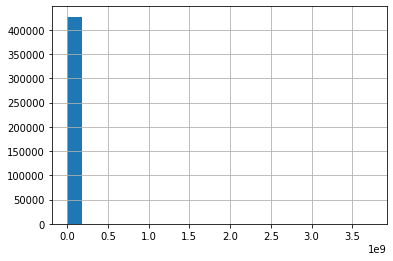

In [11]:
vehicles["price"].hist(bins=20)
plt.show()

<AxesSubplot:title={'center':'Average price by Manufacturer'}, xlabel='manufacturer'>

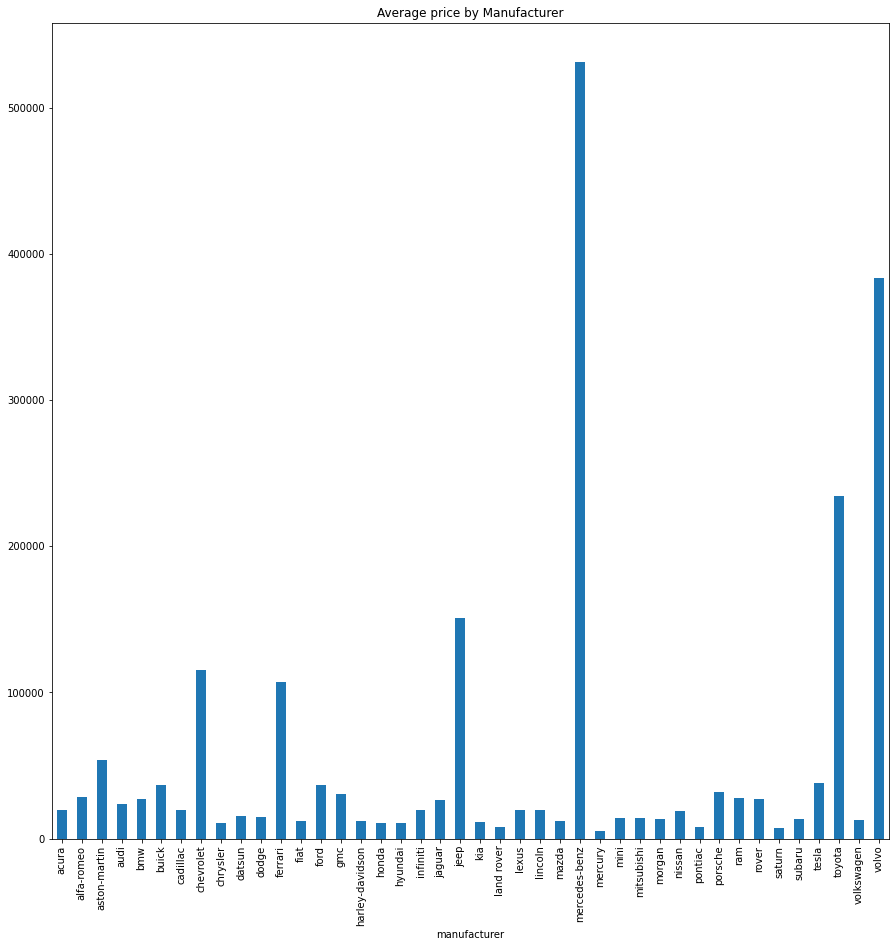

In [12]:
avg_price_by_manufacturer = vehicles.groupby("manufacturer")["price"].mean()
avg_price_by_manufacturer.plot(kind="bar", title="Average price by Manufacturer", figsize=(15,15))

<AxesSubplot:title={'center':'Average price by Cylinders'}, xlabel='cylinders'>

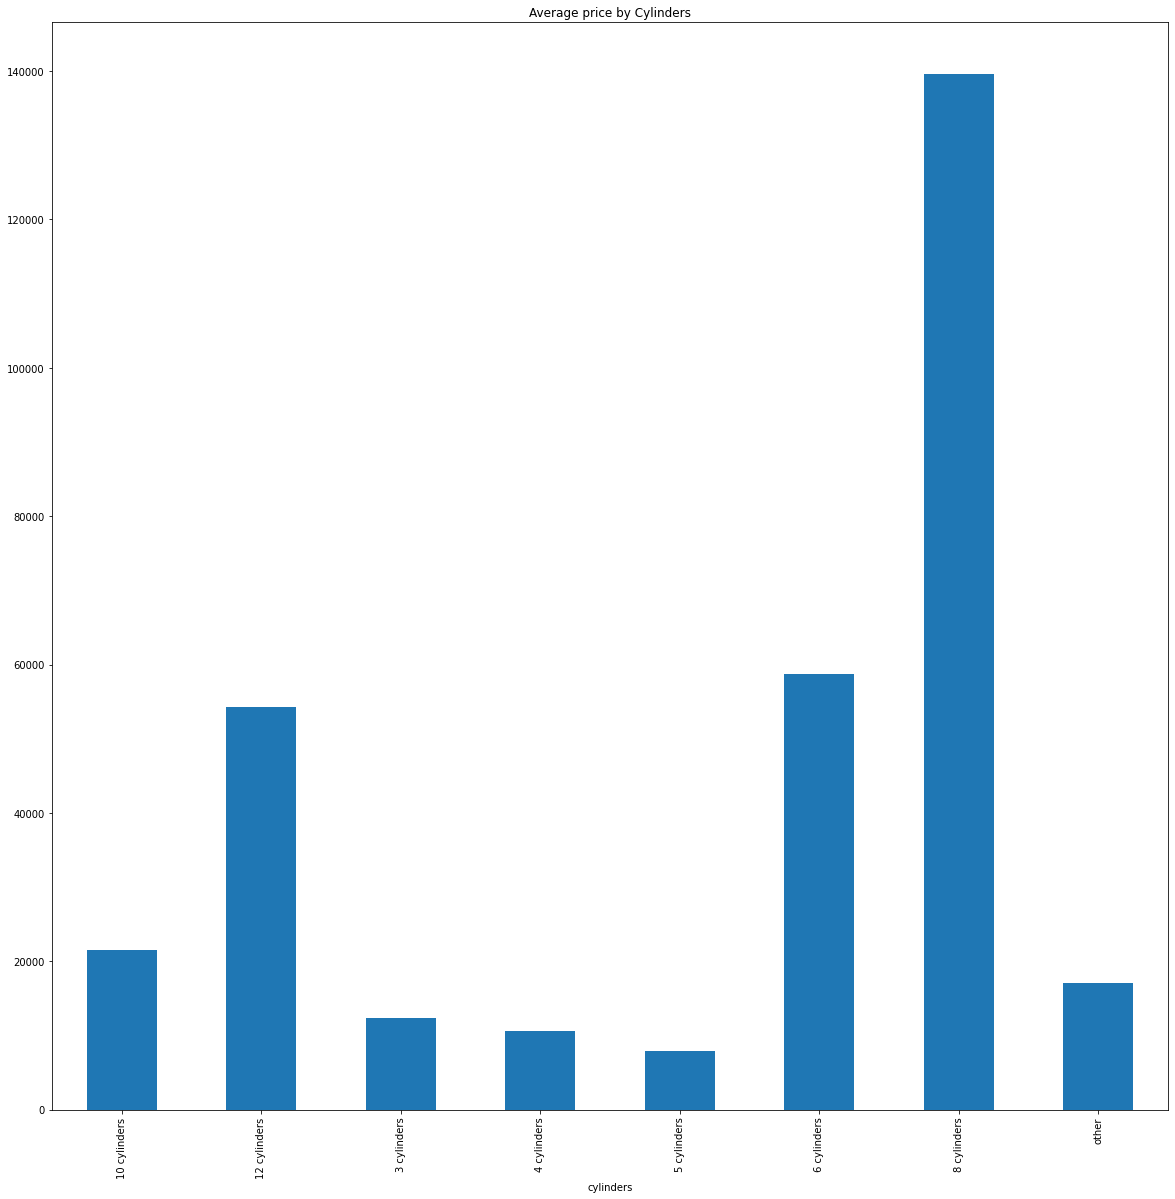

In [13]:
# Average price by Cylinders
avg_price_by_manufacturer = vehicles.groupby("cylinders")["price"].mean()
avg_price_by_manufacturer.plot(kind="bar", title="Average price by Cylinders", figsize=(20,20))

In [ ]:
vehicles.to_csv('s3://ml-ai-bucket/vehicles_cleaned.csv')